# TensorFlow逻辑回归:

* 逻辑回归原理（二分类）
* Tensorflow 逻辑回归（二分类）
* 逻辑回归原理（多分类）
* Tensorflow 逻辑回归（多分类）

# 逻辑回归原理（二分类）
下图展示了逻辑回归的目标函数、损失函数和权重更新过程。

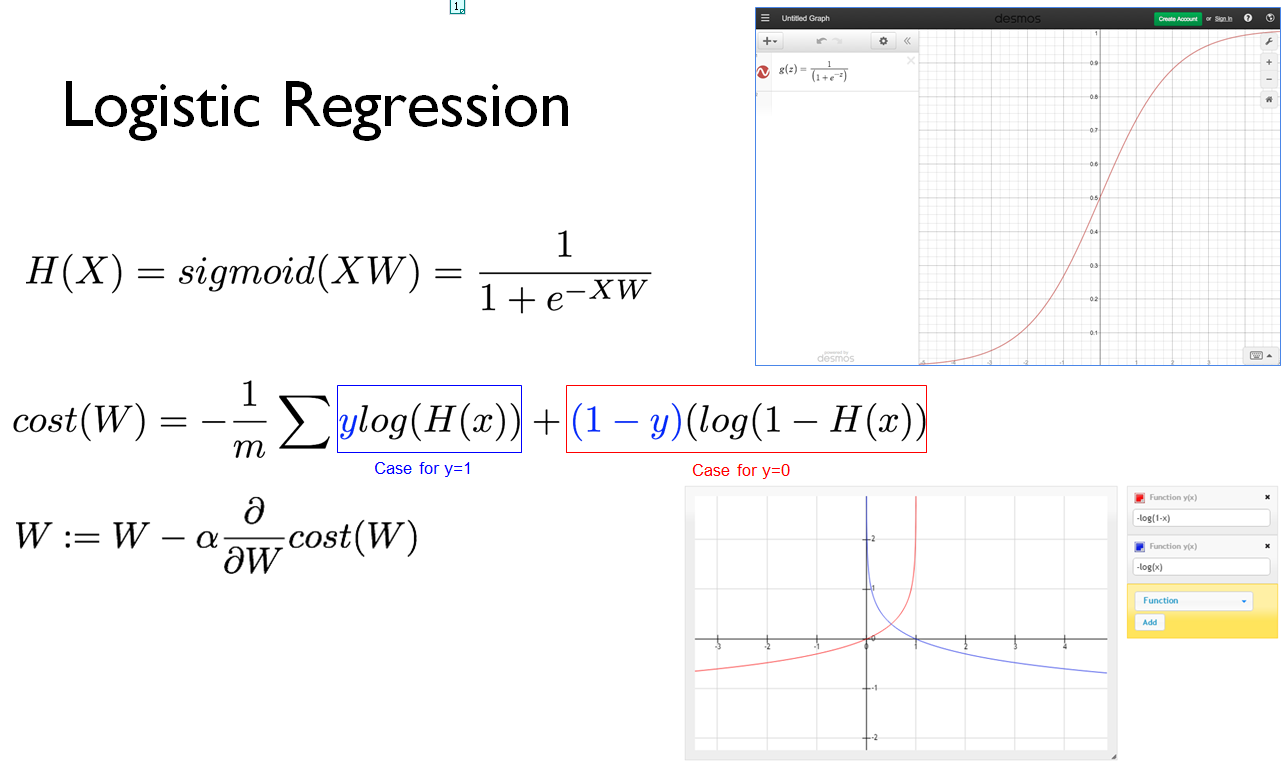

# tensorflow逻辑回归（二分类）
tensorflow机器工作基本流程包括**构建计算图、输入数据、更新权重并返回输出值**。

In [1]:
import tensorflow as tf
import numpy as np

xy = np.loadtxt('/opt/pythonenv/Tensorflow入门/dataset/data-03-diabetes.csv', delimiter=',', dtype=np.float32)

# 因变量在数据的最后一列
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W))) 模型表达式
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
# cost/loss function 损失函数
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False，tf.cast函数用于数据类型转换
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
   sess.run(tf.global_variables_initializer())

   feed = {X: x_data, Y: y_data}
   for step in range(10001):
       sess.run(train, feed_dict=feed)
       if step % 2000 == 0:
           print(step, sess.run(cost, feed_dict=feed))

   # Accuracy report
   h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict=feed)
   #print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)
   print( "\nAccuracy: ", a)

0 0.977787
2000 0.569342
4000 0.50757
6000 0.488971
8000 0.481401
10000 0.477667

Accuracy:  0.773386


# 逻辑回归原理（多分类）

### softmax模型表达式
与二分类sigmoid模型表达式不同的是，多分类逻辑回归通过softmax函数将（Wx+b)映射到（0，1）范围内具有概率性质的数字。

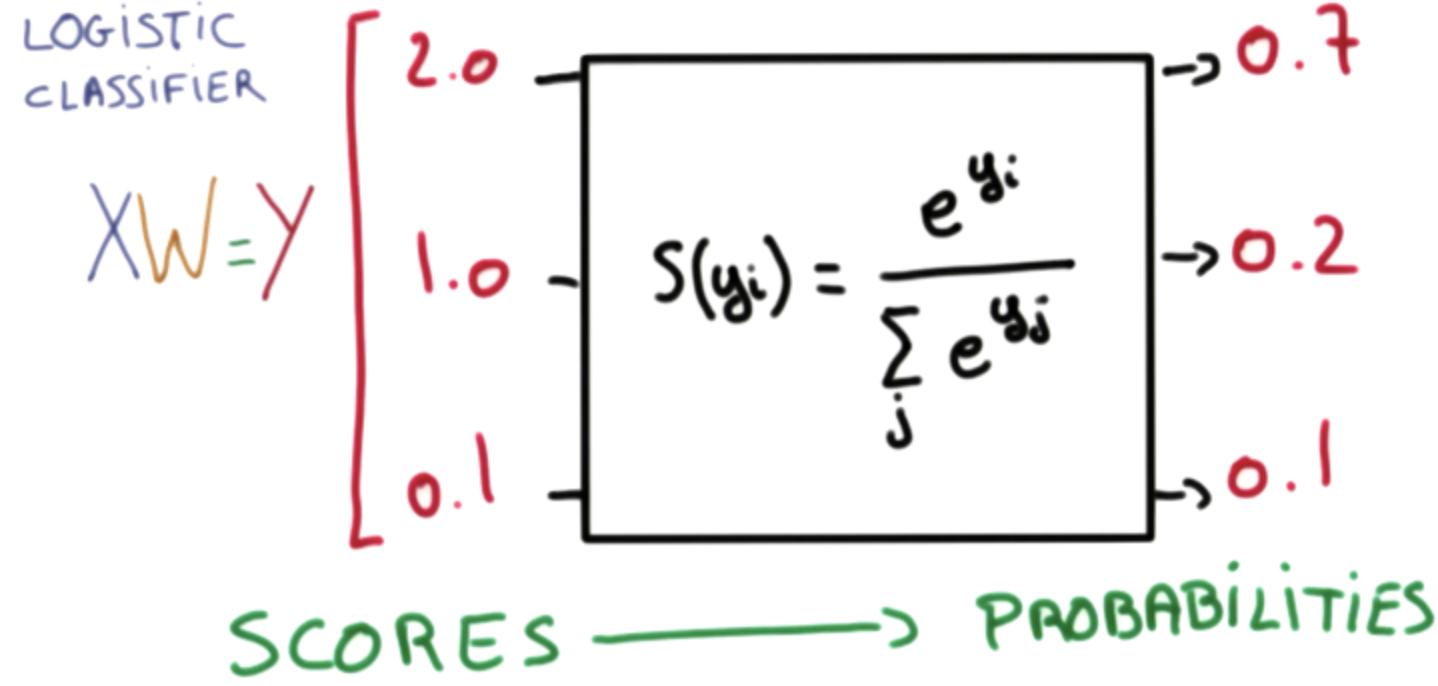

### 交叉熵损失函数

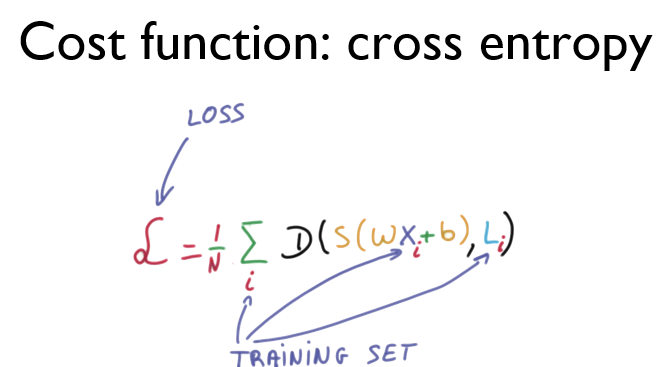

图中D(S,L)为相对熵，相对熵 = = H(p,q)交叉熵 - H(p)，H(p)是一个真实分布的期望，因此与训练无关。于是，最小化相对熵便转为最小化交叉熵，可以直接用梯度下降法求解最优值。交叉熵表达式见下图。相对熵与交叉熵关系详见**3_2 知识补充.ipynb**

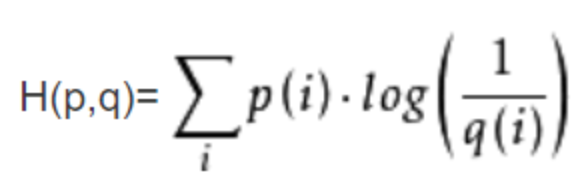

# softmax、交叉熵计算样例

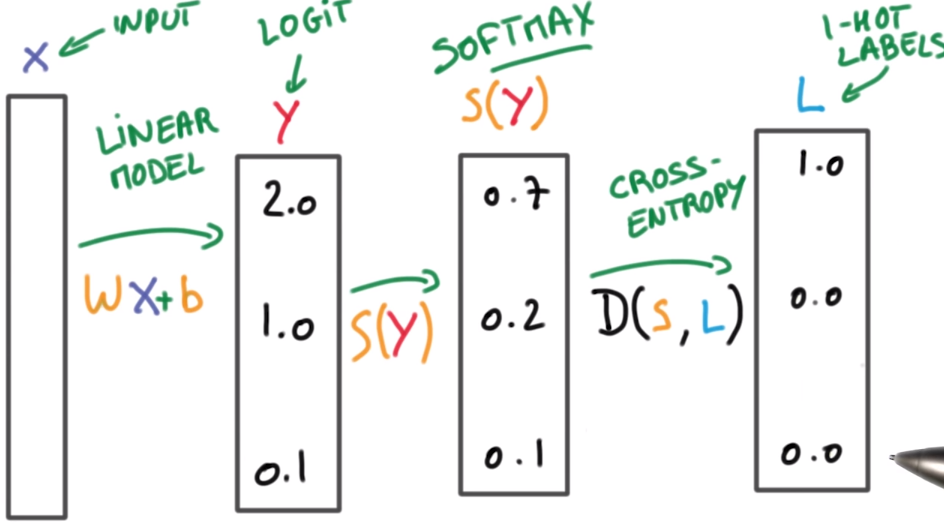

以上例子中， y一共有三类标签。模型训练得到W、b值后，**对单个样本进行预测**，logit值由W、b直接算出；该样本属于任一类的概率由Softmax函数算出，具体计算过程如下：

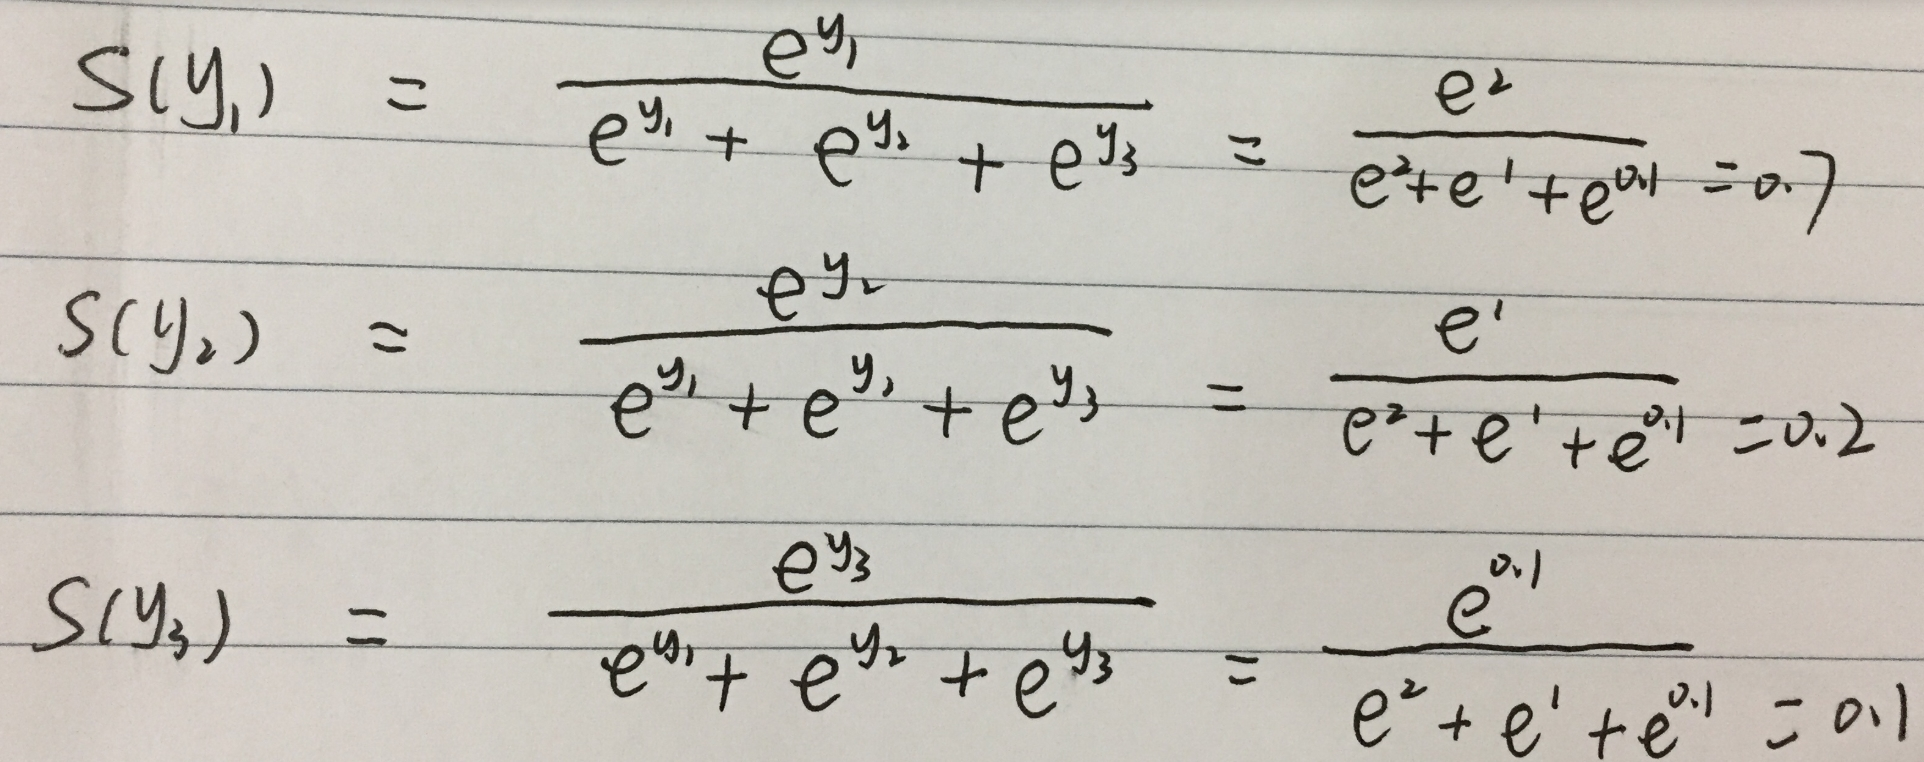

获得样本属于任一类的概率分布后（离标签散分布），需要计算该分布与真实标签概率分布之前的距离（计算流程如下，此处用交叉熵代替KL距离）。如果距离过大，模型将继续进行梯度下降迭代以更新参数W、b，使得模型预测的概率分布逼近真实标签概率分布。下图中的Pi是真实标签概率分布，Qi是预测标签概率分布。

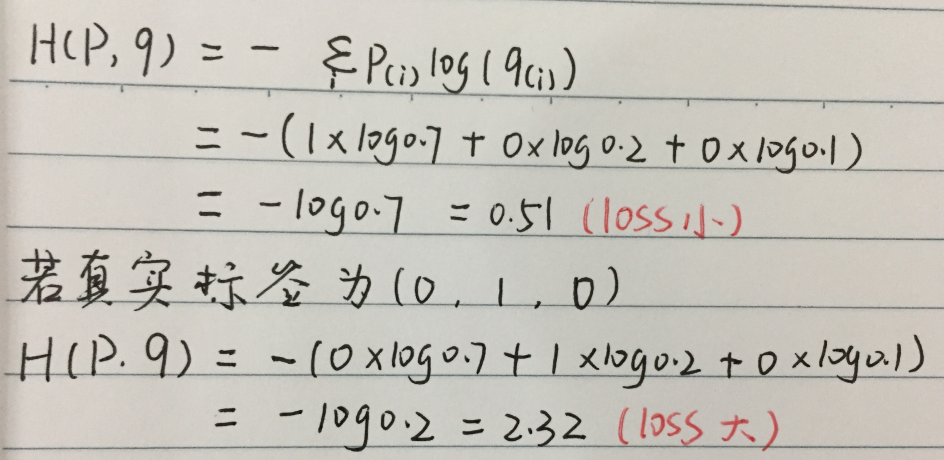

In [2]:
import tensorflow as tf
tf.set_random_seed(35)  # for reproducibility

#4维，8个样本
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
#3类
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 500 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

    print('--------------')

    # Testing & One-hot encoding，tf.argmax
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1)))

    print('--------------')

    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.argmax(b, 1)))

    print('--------------')

    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.argmax(c, 1)))

    print('--------------')

    all = sess.run(hypothesis, feed_dict={
                   X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))

'''
--------------
[[  1.38904958e-03   9.98601854e-01   9.06129117e-06]] [1]
--------------
[[ 0.93119204  0.06290206  0.0059059 ]] [0]
--------------
[[  1.27327668e-08   3.34112905e-04   9.99665856e-01]] [2]
--------
------
[[  1.38904958e-03   9.98601854e-01   9.06129117e-06]
 [  9.31192040e-01   6.29020557e-02   5.90589503e-03]
 [  1.27327668e-08   3.34112905e-04   9.99665856e-01]] [1 0 2]
'''

0 7.38648
500 0.424114
1000 0.249127
1500 0.19231
2000 0.158401
--------------
[[  9.03503038e-03   9.90955532e-01   9.43963914e-06]] [1]
--------------
[[ 0.81627232  0.16517574  0.01855195]] [0]
--------------
[[  1.52683111e-08   3.47297813e-04   9.99652743e-01]] [2]
--------------
[[  9.03503038e-03   9.90955532e-01   9.43963914e-06]
 [  8.16272318e-01   1.65175736e-01   1.85519513e-02]
 [  1.52683111e-08   3.47297813e-04   9.99652743e-01]] [1 0 2]


'\n--------------\n[[  1.38904958e-03   9.98601854e-01   9.06129117e-06]] [1]\n--------------\n[[ 0.93119204  0.06290206  0.0059059 ]] [0]\n--------------\n[[  1.27327668e-08   3.34112905e-04   9.99665856e-01]] [2]\n--------\n------\n[[  1.38904958e-03   9.98601854e-01   9.06129117e-06]\n [  9.31192040e-01   6.29020557e-02   5.90589503e-03]\n [  1.27327668e-08   3.34112905e-04   9.99665856e-01]] [1 0 2]\n'